In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("StudySleep_ExamScore_DTR (1).csv")

In [3]:
df

,Study_Hours,Sleep_Hours,Exam_Score
0,7.12,6.57,34.55
1,3.22,7.33,33.08
2,2.66,4.53,23.91
3,5.74,4.65,32.49
4,7.33,5.61,34.59
...,...,...,...
95,7.07,7.18,39.75
96,1.94,4.16,23.74
97,4.29,7.72,37.44
98,2.79,6.36,25.22


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Study_Hours  100 non-null    float64
 1   Sleep_Hours  100 non-null    float64
 2   Exam_Score   100 non-null    float64
dtypes: float64(3)
memory usage: 2.5 KB


In [5]:
df.columns

Index(['Study_Hours', 'Sleep_Hours', 'Exam_Score'], dtype='object')

In [6]:
x=df[['Study_Hours', 'Sleep_Hours']].values 
y=df['Exam_Score'].values 

In [7]:
from sklearn.model_selection import train_test_split,GridSearchCV
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [8]:
x_train.shape

(80, 2)

In [9]:
x_test.shape

(20, 2)

In [10]:
from sklearn.tree import DecisionTreeRegressor
reg_tree=DecisionTreeRegressor(
    random_state=42,
    max_depth=4,
    min_samples_split=4,
    min_samples_leaf=2
)
reg_tree.fit(x_train,y_train)

DecisionTreeRegressor(max_depth=4, min_samples_leaf=2, min_samples_split=4,
                      random_state=42)

In [11]:
y_pred=reg_tree.predict(x_test)

In [12]:
from sklearn.metrics import(
    mean_squared_error,
    mean_absolute_error,
    r2_score
)
mse=mean_squared_error(y_test,y_pred)
rmse=np.sqrt(mse)
mae=mean_absolute_error(y_test,y_pred)
r2=r2_score(y_test,y_pred)
print("mse:",mse)
print("rmse:",rmse)
print("mae:",mae)
print("r2:",r2)

mse: 17.279238618383506
rmse: 4.156830357181239
mae: 3.059111111111114
r2: 0.41290271865001693


In [13]:
params = {
    "max_depth": [3, 4, 5, 6, 7, 8, None],
    "min_samples_split": [2, 4, 6, 10],
    "min_samples_leaf": [1, 2, 4, 6],
}

grid = GridSearchCV(
    estimator=DecisionTreeRegressor(random_state=42),
    param_grid=params,
    cv=5,
    scoring="r2",
    n_jobs=-1  # optional: use all cores
)

grid.fit(x_train, y_train)  # make sure it's X_train, y_train

print("Best params:", grid.best_params_)
print("Best CV R²:", grid.best_score_)


Best params: {'max_depth': 6, 'min_samples_leaf': 4, 'min_samples_split': 2}
Best CV R²: 0.5791356914411203


In [14]:
reg_tree1=DecisionTreeRegressor(
    random_state=42,
    max_depth=6,
    min_samples_split=2,
    min_samples_leaf=4
)
reg_tree1.fit(x_train,y_train)

DecisionTreeRegressor(max_depth=6, min_samples_leaf=4, random_state=42)

In [15]:
y_pred1=reg_tree1.predict(x_test)

In [16]:
mse=mean_squared_error(y_test,y_pred1)
rmse=np.sqrt(mse)
mae=mean_absolute_error(y_test,y_pred1)
r2=r2_score(y_test,y_pred1)
print("mse:",mse)
print("rmse:",rmse)
print("mae:",mae)
print("r2:",r2)

mse: 17.906125453089572
rmse: 4.231563003559036
mae: 3.099765476190476
r2: 0.391602963232642


In [17]:
results = pd.DataFrame({
    "Study_Hours": x_test[:, 0],
    "Sleep_Hours": x_test[:, 1],
    "Actual_Score": y_test,
    "Predicted_Score": y_pred1
})
print("\nSample predictions:")
print(results.head(10))


Sample predictions:
   Study_Hours  Sleep_Hours  Actual_Score  Predicted_Score
0         4.20         8.06         36.88        37.023333
1         5.68         5.53         26.77        32.028333
2         1.41         7.76         30.83        30.148000
3         2.88         7.77         34.69        37.023333
4         8.73         6.29         40.71        38.376000
5         5.27         6.74         36.27        35.622500
6         7.38         5.46         33.79        32.028333
7         3.53         6.81         29.70        35.622500
8         3.76         5.58         32.31        20.237500
9         7.12         6.57         34.55        38.376000


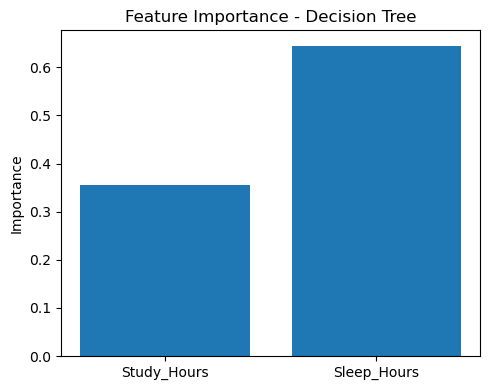

In [18]:
# 8. Feature importance
feature_names = ["Study_Hours", "Sleep_Hours"]
importances = reg_tree1.feature_importances_

plt.figure(figsize=(5,4))
plt.bar(feature_names, importances)
plt.ylabel("Importance")
plt.title("Feature Importance - Decision Tree")
plt.tight_layout()
plt.show()

In [19]:
df.columns

Index(['Study_Hours', 'Sleep_Hours', 'Exam_Score'], dtype='object')

In [20]:
new=np.array([[
    3.5,
    8.1
]])
predicted_value=reg_tree1.predict(new)

In [21]:
predicted_value

array([37.02333333])